<a href="https://colab.research.google.com/github/KhalidKhader/DS_Fund_23_8/blob/main/Project_Phase_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#LOADING DATA

In [25]:
path = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRz5oaBgbdiqB7uuCThtSDZkuQ6PVnah-MIhF81nIhaee2YT0rHhLnhLPNBuZYUNO00U4YZRDqaL8ig/pub?gid=1930592101&single=true&output=csv'
data = pd.read_csv(path)
copy_data = data.copy()
data

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833.0,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000.0,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024.0,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000.0,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000.0,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,NaN,FT,Data Engineer,154000,USD,154000.0,US,100,US,M
603,603,2022,NaN,FT,Data Engineer,126000,USD,126000.0,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,NaN,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000.0,US,100,US,M


In [26]:
copy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          607 non-null    int64  
 1   work_year           607 non-null    int64  
 2   experience_level    589 non-null    object 
 3   employment_type     607 non-null    object 
 4   job_title           607 non-null    object 
 5   salary              607 non-null    object 
 6   salary_currency     607 non-null    object 
 7   salary_in_usd       587 non-null    float64
 8   employee_residence  607 non-null    object 
 9   remote_ratio        607 non-null    int64  
 10  company_location    607 non-null    object 
 11  company_size        607 non-null    object 
dtypes: float64(1), int64(3), object(8)
memory usage: 57.0+ KB


In [27]:
copy_data.isna().sum()

Unnamed: 0             0
work_year              0
experience_level      18
employment_type        0
job_title              0
salary                 0
salary_currency        0
salary_in_usd         20
employee_residence     0
remote_ratio           0
company_location       0
company_size           0
dtype: int64

# Data Cleaning

### How many rows and columns?



In [28]:
copy_data.shape

(607, 12)

### What are the datatypes of each variable?

In [29]:
copy_data.dtypes

Unnamed: 0              int64
work_year               int64
experience_level       object
employment_type        object
job_title              object
salary                 object
salary_currency        object
salary_in_usd         float64
employee_residence     object
remote_ratio            int64
company_location       object
company_size           object
dtype: object

### Drop un needed columns




In [30]:
copy_data = copy_data.drop(columns=['Unnamed: 0'])

In [31]:
copy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           607 non-null    int64  
 1   experience_level    589 non-null    object 
 2   employment_type     607 non-null    object 
 3   job_title           607 non-null    object 
 4   salary              607 non-null    object 
 5   salary_currency     607 non-null    object 
 6   salary_in_usd       587 non-null    float64
 7   employee_residence  607 non-null    object 
 8   remote_ratio        607 non-null    int64  
 9   company_location    607 non-null    object 
 10  company_size        607 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 52.3+ KB


### Are there duplicates? If so, drop any duplicates.

In [32]:
copy_data.duplicated().sum()

32

In [33]:
copy_data.drop_duplicates(inplace = True)

In [34]:
copy_data.duplicated().sum()

0

### Missing Values

In [35]:
copy_data.isna().sum()

work_year              0
experience_level      18
employment_type        0
job_title              0
salary                 0
salary_currency        0
salary_in_usd         20
employee_residence     0
remote_ratio           0
company_location       0
company_size           0
dtype: int64

In [37]:
round(copy_data.isna().sum() / len(copy_data) *100 , 2)

work_year             0.00
experience_level      3.13
employment_type       0.00
job_title             0.00
salary                0.00
salary_currency       0.00
salary_in_usd         3.48
employee_residence    0.00
remote_ratio          0.00
company_location      0.00
company_size          0.00
dtype: float64

In [38]:
copy_data['experience_level'].value_counts()

SE    244
MI    206
EN     85
EX     22
Name: experience_level, dtype: int64

<ipython-input-40-f4ca2bf35260>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])
<ipython-input-40-f4ca2bf35260>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])


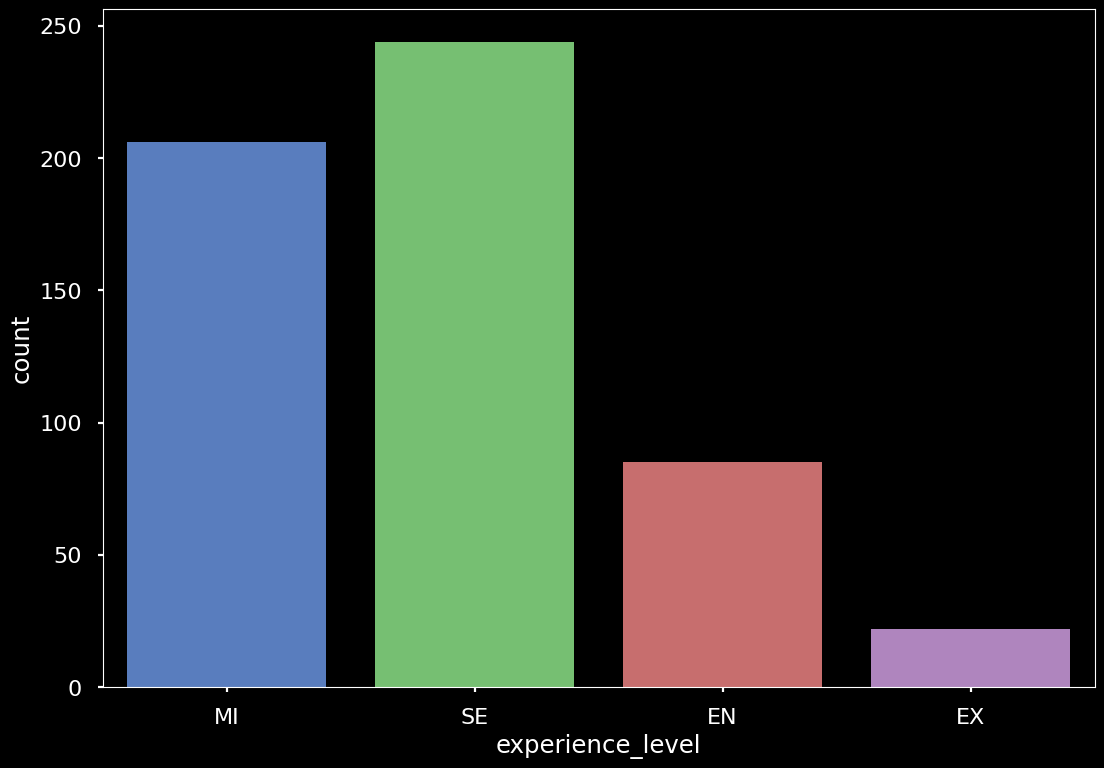

In [40]:
plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])
ax = sns.countplot(data = copy_data, x = 'experience_level');

In [42]:
copy_data['experience_level'] = copy_data['experience_level'].fillna(value = 'Unknown')
copy_data['experience_level'].value_counts()

SE         244
MI         206
EN          85
EX          22
Unknown     18
Name: experience_level, dtype: int64

In [44]:
copy_data.isna().sum()

work_year              0
experience_level       0
employment_type        0
job_title              0
salary                 0
salary_currency        0
salary_in_usd         20
employee_residence     0
remote_ratio           0
company_location       0
company_size           0
dtype: int64

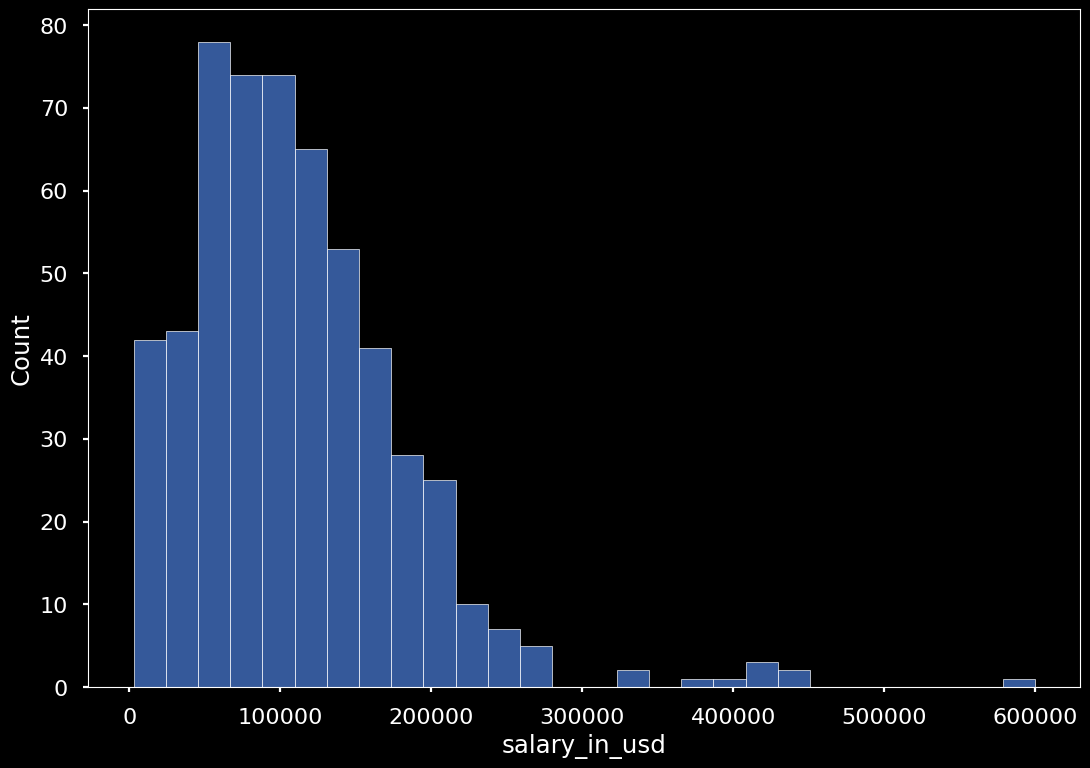

In [45]:
ax = sns.histplot(data = copy_data, x = 'salary_in_usd')

In [47]:
print(f"{copy_data['salary_in_usd'].mean():.2f}")
print(f"{copy_data['salary_in_usd'].median():.2f}")

110239.92
100000.00


### Fill With Median

In [48]:
midean_value = copy_data['salary_in_usd'].median()
copy_data['salary_in_usd'] = copy_data['salary_in_usd'].fillna(midean_value)

In [49]:
copy_data.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

### Fix Data Types

In [51]:
copy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           575 non-null    int64  
 1   experience_level    575 non-null    object 
 2   employment_type     575 non-null    object 
 3   job_title           575 non-null    object 
 4   salary              575 non-null    object 
 5   salary_currency     575 non-null    object 
 6   salary_in_usd       575 non-null    float64
 7   employee_residence  575 non-null    object 
 8   remote_ratio        575 non-null    int64  
 9   company_location    575 non-null    object 
 10  company_size        575 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 53.9+ KB


In [53]:
pd.set_option('display.max_rows', None)
copy_data['salary'].value_counts()

80000       18
120000      15
100000      15
60000       14
150000      14
50000       12
75000       11
200000      10
130000      10
70000       10
90000       10
135000       9
160000       8
180000       8
110000       8
40000        8
170000       7
65000        7
85000        7
55000        6
115000       6
45000        6
20000        6
105000       5
30000        5
48000        4
165000       4
58000        4
250000       4
450000       4
140000       4
35000        4
125000       4
140400       3
144000       3
235000       3
54000        3
220000       3
12000        3
59000        3
205300       3
42000        3
112900       3
81666        2
153000       2
53000        2
240000       2
102100       2
167000       2
106260       2
126500       2
7000000      2
24000        2
160080       2
220110       2
132320       2
225000       2
38400        2
109280       2
155000       2
210000       2
95000        2
4000         2
115934       2
147000       2
215300       2
174000    

In [55]:
dollar_sign = copy_data['salary'] == '$100,000'
copy_data.loc[dollar_sign, 'salary'] = 100000
copy_data['salary'] = copy_data['salary'].astype('int64')

In [58]:
copy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           575 non-null    int64  
 1   experience_level    575 non-null    object 
 2   employment_type     575 non-null    object 
 3   job_title           575 non-null    object 
 4   salary              575 non-null    int64  
 5   salary_currency     575 non-null    object 
 6   salary_in_usd       575 non-null    float64
 7   employee_residence  575 non-null    object 
 8   remote_ratio        575 non-null    int64  
 9   company_location    575 non-null    object 
 10  company_size        575 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 53.9+ KB


### Inspecting Categorical Columns & Addressing Inconsistent


In [64]:
cols = copy_data.dtypes
str_cols = cols[cols == 'object'].index
str_cols

Index(['experience_level', 'employment_type', 'job_title', 'salary_currency',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object')

In [65]:
for col in str_cols:
    print(f'- {col}:')
    print(copy_data[col].value_counts(dropna=False))
    print("\n\n")

- experience_level:
SE         244
MI         206
EN          85
EX          22
Unknown     18
Name: experience_level, dtype: int64



- employment_type:
FT    556
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64



- job_title:
Data Scientist                              102
Data Engineer                                95
Data Analyst                                 75
Machine Learning Engineer                    39
data scientist                               29
data engr                                    28
Research Scientist                           16
data analyst                                 14
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager            

In [66]:
job_content_map = {'data scientist':'Data Scientist',
                   'data engr':'Data Engineer',
                   'data analyst':'Data Analyst'}
copy_data['job_title'] = copy_data['job_title'].replace(job_content_map)


In [68]:
copy_data['job_title'].value_counts()

Data Scientist                              131
Data Engineer                               123
Data Analyst                                 89
Machine Learning Engineer                    39
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

In [70]:
job_exp_map = {'EN':'Junior',
               'MI':'Intermediate',
               'SE':'Expert',
               'EX':'Director'}

In [71]:
copy_data['experience_level'] = copy_data['experience_level'].replace(job_exp_map)
copy_data['experience_level'].value_counts()

Expert          244
Intermediate    206
Junior           85
Director         22
Unknown          18
Name: experience_level, dtype: int64

In [72]:
job_time_map =  {'FT':'Full-Time',
                'CT':'Contract',
                'PT':'Part-Time',
                'FL':'Freelance',}


In [73]:
copy_data['employment_type'] = copy_data['employment_type'].replace(job_time_map)
copy_data['employment_type'].value_counts()

Full-Time    556
Part-Time     10
Contract       5
Freelance      4
Name: employment_type, dtype: int64

### Summary Statistics for Numeric Features


In [75]:
copy_data.describe().round(2)

,work_year,salary,salary_in_usd,remote_ratio
count,575.00,575.00,575.00,575.00
mean,2021.37,334434.87,109883.75,70.09
std,0.70,1586130.85,71140.96,40.91
min,2020.00,4000.00,2859.00,0.00
25%,2021.00,68500.00,61733.50,50.00
50%,2021.00,112300.00,100000.00,100.00
75%,2022.00,165000.00,147400.00,100.00
max,2022.00,30400000.00,600000.00,100.00


In [77]:
stats =  copy_data.describe()
stats.loc[['mean','min','max']]

,work_year,salary,salary_in_usd,remote_ratio
mean,2021.373913,3.344349e+05,109883.749565,70.086957
min,2020.000000,4.000000e+03,2859.000000,0.000000
max,2022.000000,3.040000e+07,600000.000000,100.000000


In [78]:
max_sal = copy_data['salary'] == 30400000.00
copy_data[max_sal]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
177,2021,Intermediate,Full-Time,Data Scientist,30400000,CLP,40038.0,CL,100,CL,L
